In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/FirstAssignmentAI

/content/drive/MyDrive/FirstAssignmentAI


In [3]:
ls

AssignmentFirst.ipynb  HappinessSouthAsia.csv  WHR-2024-5CS037.csv


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Tasks - to - do:
# 3.1 problem - 1: getting started with data exploration
# Reading the given file
df = pd.read_csv("WHR-2024-5CS037.csv")

In [6]:
# Data exploration and understanding:
# Dataset overview:
# 1. display the first 10 rows
print("First 10 rows of the dataset:")
print(df.head(10))

First 10 rows of the dataset:
  Country name  score  Log GDP per capita  Social support  \
0      Finland  7.741               1.844           1.572   
1      Denmark  7.583               1.908           1.520   
2      Iceland  7.525               1.881           1.617   
3       Sweden  7.344               1.878           1.501   
4       Israel  7.341               1.803           1.513   
5  Netherlands  7.319               1.901           1.462   
6       Norway  7.302               1.952           1.517   
7   Luxembourg  7.122               2.141           1.355   
8  Switzerland  7.060               1.970           1.425   
9    Australia  7.057               1.854           1.461   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.695                         0.859       0.142   
1                    0.699                         0.823       0.204   
2                    0.718                         0.819       0.258   
3         

In [7]:
# 2. identify the number of rows and columns
print("\nDataset Shape (Rows, Columns):", df.shape)


Dataset Shape (Rows, Columns): (143, 9)


In [8]:
# 3. list all the columns and their data types
print("\nColumns and Data Types:")
print(df.dtypes)


Columns and Data Types:
Country name                     object
score                           float64
Log GDP per capita              float64
Social support                  float64
Healthy life expectancy         float64
Freedom to make life choices    float64
Generosity                      float64
Perceptions of corruption       float64
Dystopia + residual             float64
dtype: object


In [9]:
# Basic statistics
# 1. mean median and standard devaiation for 'score' column
mean_score = df['score'].mean()
median_score = df['score'].median()
std_score = df['score'].std()

print(f"\nMean Happiness Score: {mean_score}")
print(f"Median Happiness Score: {median_score}")
print(f"Standard Deviation of Happiness Score: {std_score}")

df.describe()


Mean Happiness Score: 5.52758041958042
Median Happiness Score: 5.785
Standard Deviation of Happiness Score: 1.1707165099442995


,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
count,143.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000
mean,5.527580,1.378807,1.134329,0.520886,0.620621,0.146271,0.154121,1.575914
std,1.170717,0.425098,0.333317,0.164923,0.162492,0.073441,0.126238,0.537459
min,1.721000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.073000
25%,4.726000,1.077750,0.921750,0.398000,0.527500,0.091000,0.068750,1.308250
50%,5.785000,1.431500,1.237500,0.549500,0.641000,0.136500,0.120500,1.644500
75%,6.416000,1.741500,1.383250,0.648500,0.736000,0.192500,0.193750,1.881750
max,7.741000,2.141000,1.617000,0.857000,0.863000,0.401000,0.575000,2.998000


In [10]:
# 2. identify the country with the highest and lothe implementationst happiness scores.
max_score_country = df[df['score'] == df['score'].max()]['Country name'].iloc[0]
min_score_country = df[df['score'] == df['score'].min()]['Country name'].iloc[0]

print(f"\nCountry with the Highest Happiness Score: {max_score_country}")
print(f"Country with the Lowest Happiness Score: {min_score_country}")


Country with the Highest Happiness Score: Finland
Country with the Lowest Happiness Score: Afghanistan


In [11]:
# Missign values
# 1. checking if there is any missing value in the dataset and display the total count for each column with missing value
print("\nMissing Values in Each Column:")
print(df.isnull().sum())


Missing Values in Each Column:
Country name                    0
score                           0
Log GDP per capita              3
Social support                  3
Healthy life expectancy         3
Freedom to make life choices    3
Generosity                      3
Perceptions of corruption       3
Dystopia + residual             3
dtype: int64


In [12]:
# Filtering and sorting
# 1. filter dataset to show countries with score > 7.5
filtered_df = df[df['score'] > 7.5]

In [13]:
# 2. sort by gdp per capita in descending order and display top 10 rows
sorted_df = filtered_df.sort_values(by='Log GDP per capita', ascending=False).head(10)
print("\nTop 10 Countries with Score > 7.5 Sorted by GDP per Capita:")
print(sorted_df)


Top 10 Countries with Score > 7.5 Sorted by GDP per Capita:
  Country name  score  Log GDP per capita  Social support  \
1      Denmark  7.583               1.908           1.520   
2      Iceland  7.525               1.881           1.617   
0      Finland  7.741               1.844           1.572   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
1                    0.699                         0.823       0.204   
2                    0.718                         0.819       0.258   
0                    0.695                         0.859       0.142   

   Perceptions of corruption  Dystopia + residual  
1                      0.548                1.881  
2                      0.182                2.050  
0                      0.546                2.082  


In [14]:
# Add a new column 'happiness_category'
conditions = [
    df['score'] < 4,
    (df['score'] >= 4) & (df['score'] <= 6),
    df['score'] > 6
]
categories = ['Low', 'Medium', 'High']

df['Happiness_Category'] = pd.cut(df['score'], bins=[-float('inf'), 4, 6, float('inf')], labels=categories)
print("\nDataset with 'Happiness_Category' column added:")
print(df.head(10))


Dataset with 'Happiness_Category' column added:
  Country name  score  Log GDP per capita  Social support  \
0      Finland  7.741               1.844           1.572   
1      Denmark  7.583               1.908           1.520   
2      Iceland  7.525               1.881           1.617   
3       Sweden  7.344               1.878           1.501   
4       Israel  7.341               1.803           1.513   
5  Netherlands  7.319               1.901           1.462   
6       Norway  7.302               1.952           1.517   
7   Luxembourg  7.122               2.141           1.355   
8  Switzerland  7.060               1.970           1.425   
9    Australia  7.057               1.854           1.461   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.695                         0.859       0.142   
1                    0.699                         0.823       0.204   
2                    0.718                         0.819       

<ipython-input-15-53c798c6bf4e>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='score', y='Country name', data=top_10_happiest, palette='rocket')


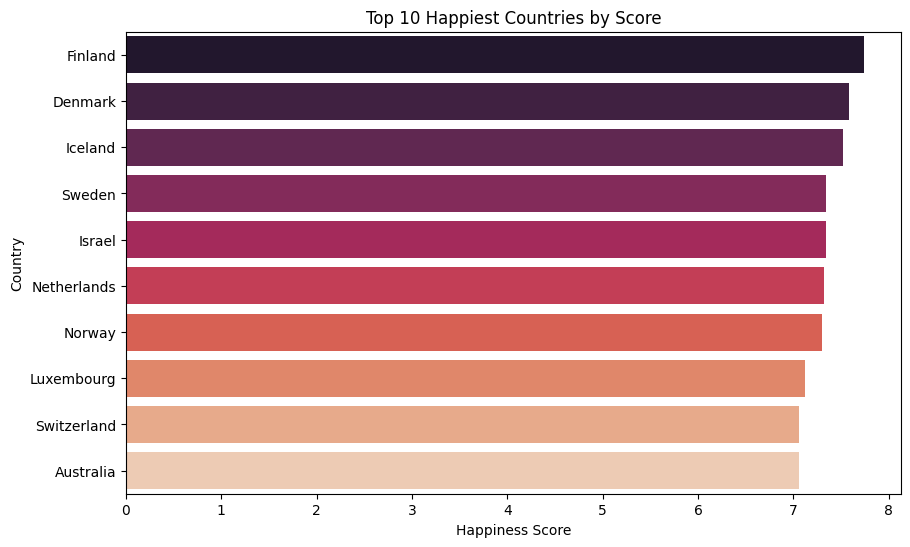

In [15]:
# Data visualizations
# 1. bar visualize: top 10 happiest countries by score
top_10_happiest = df.nlargest(10, 'score')  # Select the top 10 countries by score
plt.figure(figsize=(10, 6))
sns.barplot(x='score', y='Country name', data=top_10_happiest, palette='rocket')
plt.title('Top 10 Happiest Countries by Score')
plt.xlabel('Happiness Score')
plt.ylabel('Country')
plt.show()


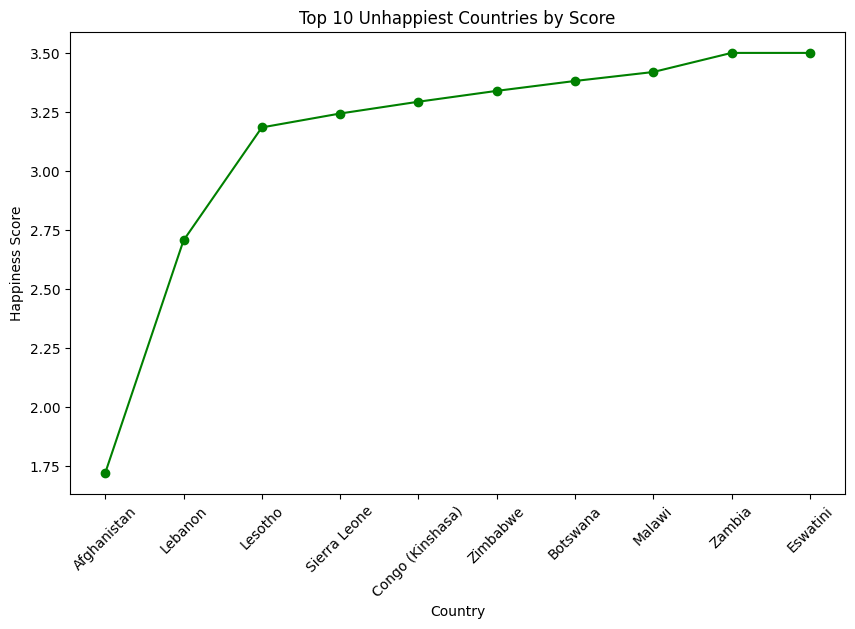

In [16]:
# 2. line visualize: top 10 unhappiest countries by score
top_10_unhappiest = df.nsmallest(10, 'score')  # Select the bottom 10 countries by score
plt.figure(figsize=(10, 6))
plt.plot(top_10_unhappiest['Country name'], top_10_unhappiest['score'], marker='o', linestyle='-', color='green')
plt.title('Top 10 Unhappiest Countries by Score')
plt.xlabel('Country')
plt.ylabel('Happiness Score')
plt.xticks(rotation=45)  # Rotate country names for better visibility
plt.show()

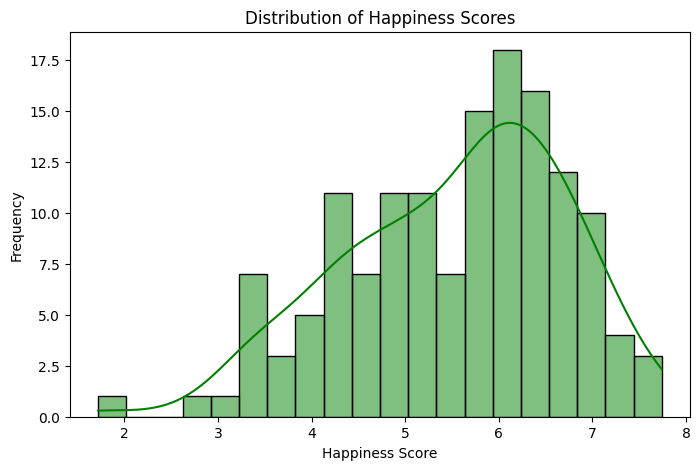

In [17]:
# 3. histogram: distribution of happiness scores
plt.figure(figsize=(8, 5))
sns.histplot(df['score'], bins=20, kde=True, color='green')
plt.title('Distribution of Happiness Scores')
plt.xlabel('Happiness Score')
plt.ylabel('Frequency')
plt.show()

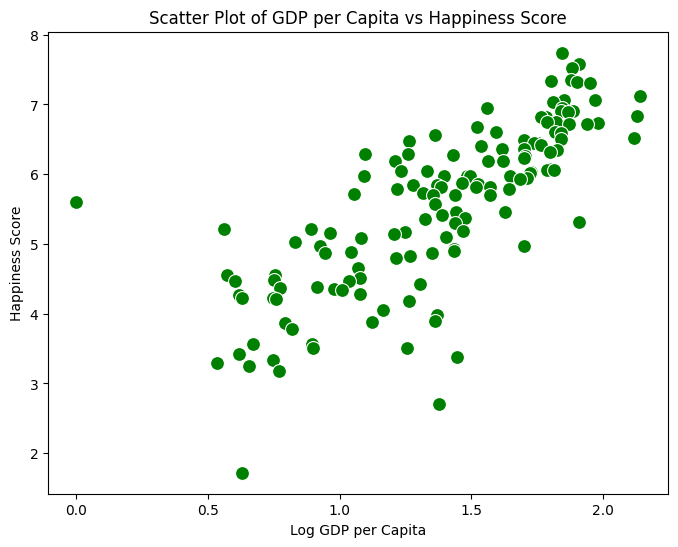

In [18]:
# 4. scatter visualize: gdp per capita vs happiness score
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Log GDP per capita', y='score', data=df, color='green', s=100)
plt.title('Scatter Plot of GDP per Capita vs Happiness Score')
plt.xlabel('Log GDP per Capita')
plt.ylabel('Happiness Score')
plt.show()

In [19]:
# 3.2 problem - 2 - some advance data exploration task:
# Task - 1: setup task - preparing the south-asia dataset
# 1. define south asian countries
south_asian_countries = ["Afghanistan", "Bangladesh", "Bhutan", "India", "Maldives", "Nepal", "Pakistan", "Sri Lanka"]

In [20]:
# 2. filter the dataset for south asian countries
south_asia_df = df[df['Country name'].isin(south_asian_countries)]
print("\nSouth Asia Dataset:")
print(south_asia_df)


South Asia Dataset:
    Country name  score  Log GDP per capita  Social support  \
92         Nepal  5.158               0.965           0.990   
107     Pakistan  4.657               1.069           0.600   
125        India  4.054               1.166           0.653   
127    Sri Lanka  3.898               1.361           1.179   
128   Bangladesh  3.886               1.122           0.249   
142  Afghanistan  1.721               0.628           0.000   

     Healthy life expectancy  Freedom to make life choices  Generosity  \
92                     0.443                         0.653       0.209   
107                    0.321                         0.542       0.144   
125                    0.417                         0.767       0.174   
127                    0.586                         0.583       0.144   
128                    0.513                         0.775       0.140   
142                    0.242                         0.000       0.091   

     Perceptions o

In [21]:
# 3. save the filtered south asia dataframe to a new csv
south_asia_df.to_csv("HappinessSouthAsia.csv", index=False)

In [22]:
# Task - 2: composite score ranking
# 1. compute composite score
south_asia_df['Composite Score'] = (0.40 * south_asia_df['Log GDP per capita'] +
                                    0.30 * south_asia_df['Social support'] +
                                    0.30 * south_asia_df['Healthy life expectancy'])

<ipython-input-22-b9e7aa11d8f4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  south_asia_df['Composite Score'] = (0.40 * south_asia_df['Log GDP per capita'] +


In [23]:
# 2. rank south asian countries based on composite score
ranked_df = south_asia_df.sort_values(by='Composite Score', ascending=False)
print("\nSouth Asia Countries Ranked by Composite Score:")
print(ranked_df[['Country name', 'Composite Score']])



South Asia Countries Ranked by Composite Score:
    Country name  Composite Score
127    Sri Lanka           1.0739
92         Nepal           0.8159
125        India           0.7874
107     Pakistan           0.7039
128   Bangladesh           0.6774
142  Afghanistan           0.3238


<ipython-input-24-42658af7b9c3>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Composite Score', y='Country name', data=ranked_df.head(5), palette='rocket', color='blue')


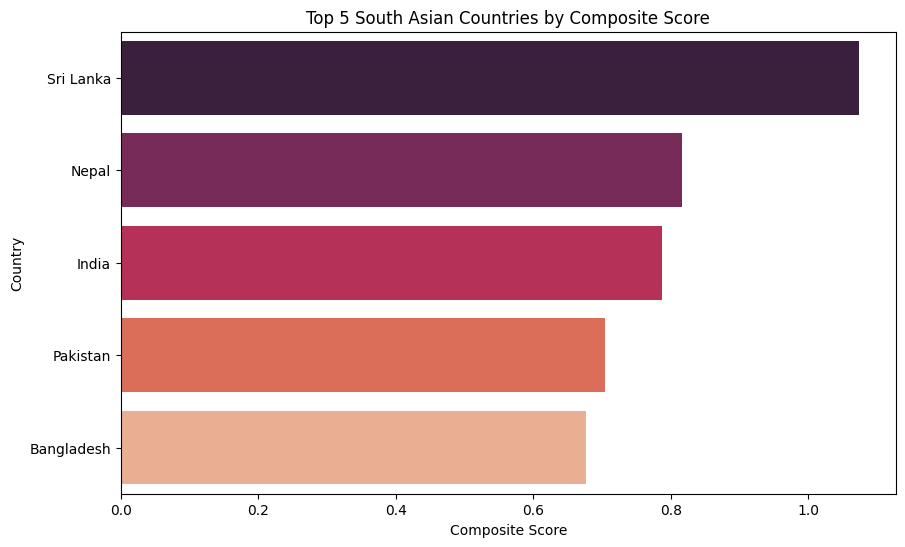

In [24]:
# 3. visualize the top 5 countries with a horizontal bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Composite Score', y='Country name', data=ranked_df.head(5), palette='rocket', color='blue')
plt.title('Top 5 South Asian Countries by Composite Score')
plt.xlabel('Composite Score')
plt.ylabel('Country')
plt.show()


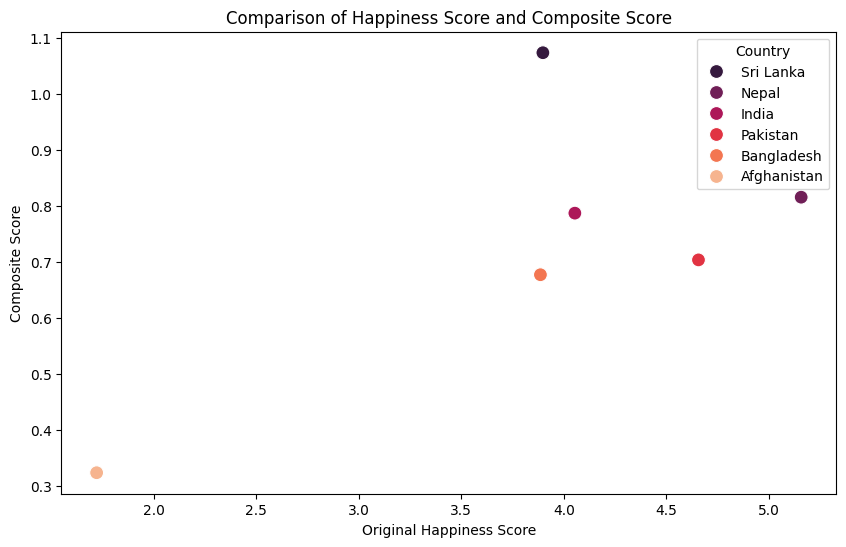

In [25]:
# 4. compare rankings with the original happiness score
plt.figure(figsize=(10, 6))
sns.scatterplot(x='score', y='Composite Score', data=ranked_df, hue='Country name', s=100, palette='rocket', color='blue')
plt.title('Comparison of Happiness Score and Composite Score')
plt.xlabel('Original Happiness Score')
plt.ylabel('Composite Score')
plt.legend(title='Country')
plt.show()

In [26]:
# Task - 3: outlier detection
# 1. identify outliers based on happiness score and gdp
Q1 = south_asia_df[['score', 'Log GDP per capita']].quantile(0.25)
Q3 = south_asia_df[['score', 'Log GDP per capita']].quantile(0.75)
IQR = Q3 - Q1

outlier_condition = ((south_asia_df['score'] < (Q1['score'] - 1.5 * IQR['score'])) |
                     (south_asia_df['score'] > (Q3['score'] + 1.5 * IQR['score']))) | \
                    ((south_asia_df['Log GDP per capita'] < (Q1['Log GDP per capita'] - 1.5 * IQR['Log GDP per capita'])) |
                     (south_asia_df['Log GDP per capita'] > (Q3['Log GDP per capita'] + 1.5 * IQR['Log GDP per capita'])))

outliers = south_asia_df[outlier_condition]
print("\nOutliers in South Asia:")
print(outliers[['Country name', 'score', 'Log GDP per capita']])



Outliers in South Asia:
    Country name  score  Log GDP per capita
142  Afghanistan  1.721               0.628


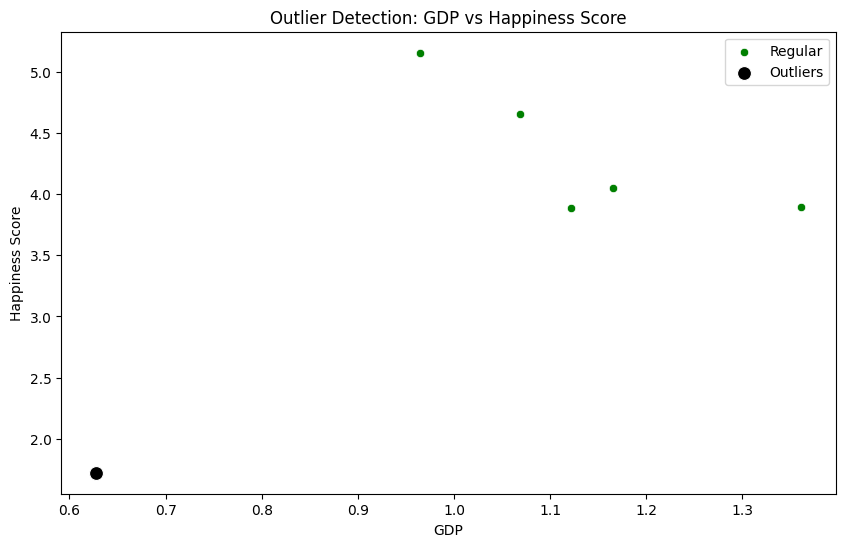

In [27]:
# 3. scatter visualize highlighting outliers
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Log GDP per capita', y='score', data=south_asia_df, color='green', label='Regular')
sns.scatterplot(x='Log GDP per capita', y='score', data=outliers, color='black', s=100, label='Outliers')
plt.title('Outlier Detection: GDP vs Happiness Score')
plt.xlabel('GDP')
plt.ylabel('Happiness Score')
plt.legend()
plt.show()



Correlation between Happiness Score and Freedom to make life choices: 0.80
Correlation between Happiness Score and Generosity: 0.87


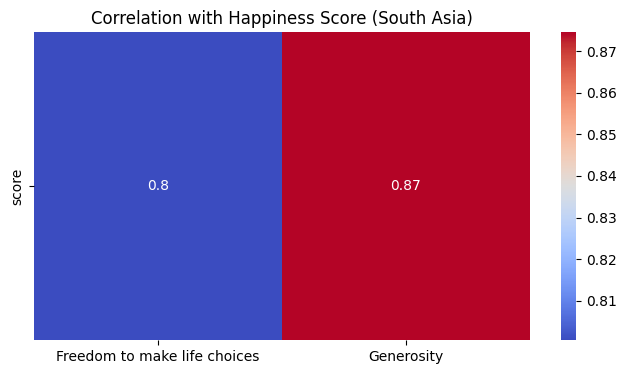

In [28]:
# Task - 4: exploring trends across metrics
# 1. compute correlations for two metrics with happiness score
metric_1 = 'Freedom to make life choices'
metric_2 = 'Generosity'

correlation_1 = south_asia_df['score'].corr(south_asia_df[metric_1])
correlation_2 = south_asia_df['score'].corr(south_asia_df[metric_2])

print(f"\nCorrelation between Happiness Score and {metric_1}: {correlation_1:.2f}")
print(f"Correlation between Happiness Score and {metric_2}: {correlation_2:.2f}")

correlation_data = pd.DataFrame({
    metric_1: [correlation_1],
    metric_2: [correlation_2]
}, index=['score'])

plt.figure(figsize=(8, 4))
sns.heatmap(correlation_data, annot=True, cmap='coolwarm')
plt.title('Correlation with Happiness Score (South Asia)')
plt.show()

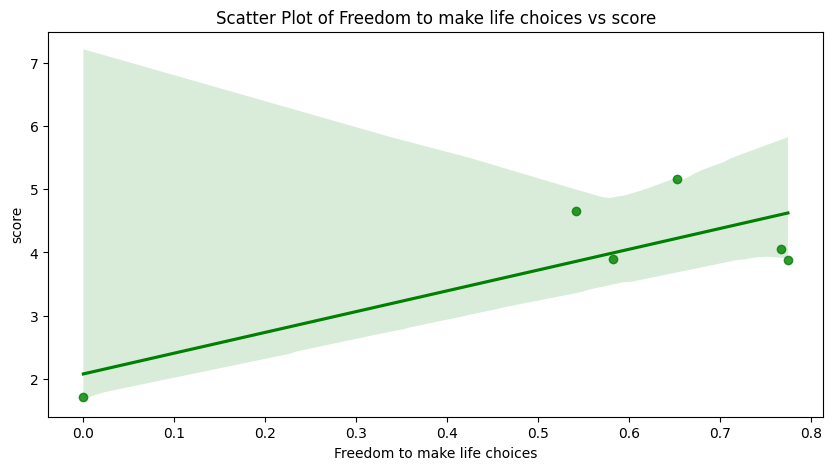

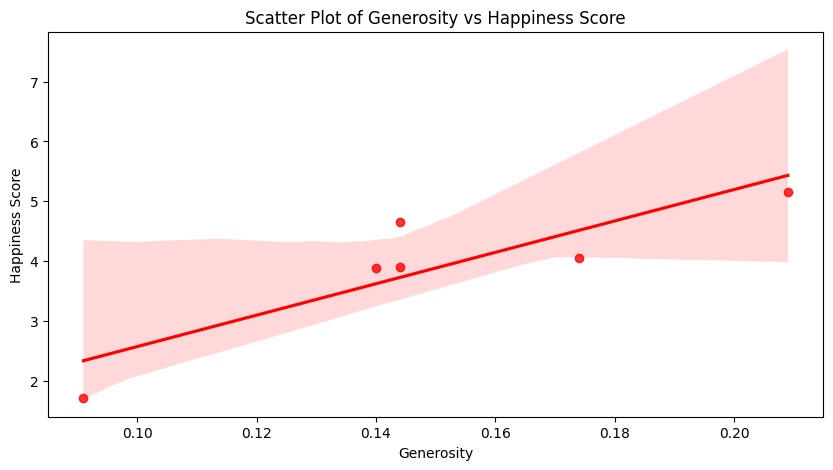

In [29]:
# 2. scatter visualizes with trendlines
plt.figure(figsize=(10, 5))
sns.regplot(x=metric_1, y='score', data=south_asia_df, color='green')
plt.title(f'Scatter Plot of {metric_1} vs score')
plt.xlabel(metric_1)
plt.ylabel('score')
plt.show()

plt.figure(figsize=(10, 5))
sns.regplot(x=metric_2, y='score', data=south_asia_df, color='red')
plt.title(f'Scatter Plot of {metric_2} vs Happiness Score')
plt.xlabel(metric_2)
plt.ylabel('Happiness Score')
plt.show()



In [30]:
# Task - 5: gap analysis
# 1. add gdp-score gap column
south_asia_df['GDP-Score Gap'] = south_asia_df['Log GDP per capita'] - south_asia_df['score']


<ipython-input-30-ce3f4fa83ef6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  south_asia_df['GDP-Score Gap'] = south_asia_df['Log GDP per capita'] - south_asia_df['score']


In [31]:
# 2. rank countries by gdp-score gap (ascending and descending)
gap_ascending = south_asia_df.sort_values(by='GDP-Score Gap', ascending=True)
gap_descending = south_asia_df.sort_values(by='GDP-Score Gap', ascending=False)

print("\nTop 3 Countries with Largest Positive GDP-Score Gap:")
print(gap_descending.head(3)[['Country name', 'GDP-Score Gap']])
print("\nTop 3 Countries with Largest Negative GDP-Score Gap:")
print(gap_ascending.head(3)[['Country name', 'GDP-Score Gap']])


Top 3 Countries with Largest Positive GDP-Score Gap:
    Country name  GDP-Score Gap
142  Afghanistan         -1.093
127    Sri Lanka         -2.537
128   Bangladesh         -2.764

Top 3 Countries with Largest Negative GDP-Score Gap:
    Country name  GDP-Score Gap
92         Nepal         -4.193
107     Pakistan         -3.588
125        India         -2.888


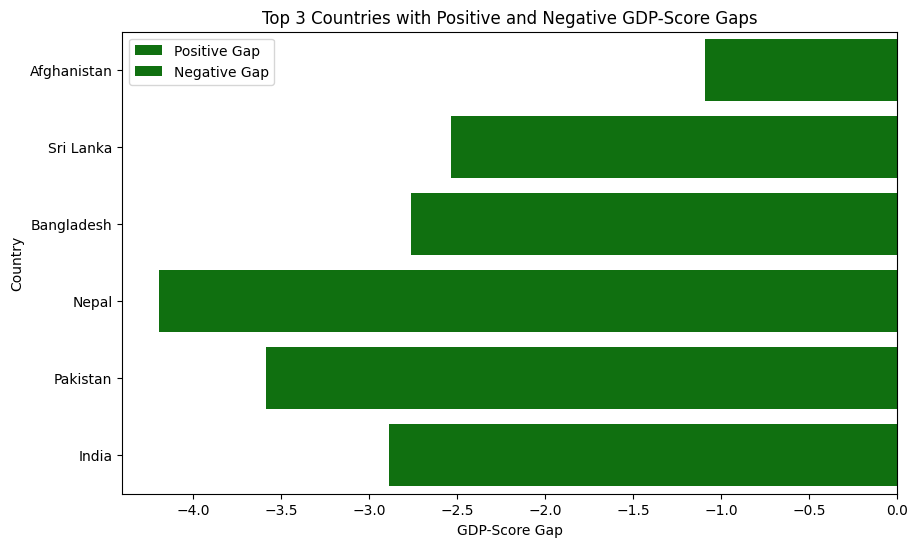

In [32]:
# 3. visualize top 3 countries for both positive and negative gaps
plt.figure(figsize=(10, 6))
sns.barplot(x='GDP-Score Gap', y='Country name', data=gap_descending.head(3), color='green', label='Positive Gap')
sns.barplot(x='GDP-Score Gap', y='Country name', data=gap_ascending.head(3), color='green', label='Negative Gap')
plt.title('Top 3 Countries with Positive and Negative GDP-Score Gaps')
plt.xlabel('GDP-Score Gap')
plt.ylabel('Country')
plt.legend()
plt.show()

In [33]:
# 3.3 problem - 3 - comparative analysis:
# Task - 1 - setup task - preparing the middle eastern dataset:
# Tasks:
# 1. similar in task - 1 of problem 2 create a dataframe from middle eastern countries. for hint use the
# Following list:

middle_east_countries = ["Bahrain", "Iran", "Iraq", "Israel", "Jordan",
                         "Kuwait", "Lebanon", "Oman", "Palestine", "Qatar",
                         "Saudi Arabia", "Syria", "United Arab Emirates", "Yemen"]

middle_east_df = df[df['Country name'].isin(middle_east_countries)]
print("\nMiddle East Dataset:")
print(middle_east_df)


Middle East Dataset:
             Country name  score  Log GDP per capita  Social support  \
4                  Israel  7.341               1.803           1.513   
12                 Kuwait  6.951               1.845           1.364   
21   United Arab Emirates  6.733               1.983           1.164   
27           Saudi Arabia  6.594               1.842           1.361   
61                Bahrain  5.959                 NaN             NaN   
91                   Iraq  5.166               1.249           0.996   
99                   Iran  4.923               1.435           1.136   
124                Jordan  4.186               1.262           0.983   
132                 Yemen  3.561               0.671           1.281   
141               Lebanon  2.707               1.377           0.577   

     Healthy life expectancy  Freedom to make life choices  Generosity  \
4                      0.740                         0.641       0.153   
12                     0.661         

In [34]:
# 1. descriptive statistics:
# Calculate mean and standard deviation of score for south asia and middle east
print("\nDescriptive Statistics:")

print(f"South Asia Mean Happiness Score: {south_asia_df['score'].mean():.2f}")
print(f"Middle East Mean Happiness Score: {middle_east_df['score'].mean():.2f}")

print(f"South Asia Standard Deviation: {south_asia_df['score'].std():.2f}")
print(f"Middle East Standard Deviation: {middle_east_df['score'].std():.2f}")

south_asia_df.describe()
#middle_east_df.describe()


Descriptive Statistics:
South Asia Mean Happiness Score: 3.90
Middle East Mean Happiness Score: 5.41
South Asia Standard Deviation: 1.18
Middle East Standard Deviation: 1.57


,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual,Composite Score,GDP-Score Gap
count,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000
mean,3.895667,1.051833,0.611833,0.420333,0.553333,0.150333,0.099500,1.008500,0.730383,-2.843833
std,1.177069,0.245361,0.441024,0.125082,0.287022,0.039267,0.046427,0.718496,0.243880,1.052798
min,1.721000,0.628000,0.000000,0.242000,0.000000,0.091000,0.031000,0.014000,0.323800,-4.193000
25%,3.889000,0.991000,0.336750,0.345000,0.552250,0.141000,0.077500,0.693000,0.684025,-3.413000
50%,3.976000,1.095500,0.626500,0.430000,0.618000,0.144000,0.101500,0.837500,0.745650,-2.826000
75%,4.506250,1.155000,0.905750,0.495500,0.738500,0.166500,0.120250,1.567000,0.808775,-2.593750
max,5.158000,1.361000,1.179000,0.586000,0.775000,0.209000,0.167000,1.907000,1.073900,-1.093000


In [35]:
# Determine which region has a higher average happiness score
higher_region = "South Asia" if south_asia_df['score'].mean() > middle_east_df['score'].mean() else "Middle East"
print(f"\nRegion with Higher Average Happiness Score: {higher_region}")



Region with Higher Average Happiness Score: Middle East


In [36]:
# 2. top and bottom performers:
# Identify top 3 and bottom 3 countries based on score for each region
print("\nTop and Bottom Performers:")

print("Top 3 South Asian Countries:")
print(south_asia_df.nlargest(3, 'score')[['Country name', 'score']])

print("\nBottom 3 South Asian Countries:")
print(south_asia_df.nsmallest(3, 'score')[['Country name', 'score']])

print("\nTop 3 Middle Eastern Countries:")
print(middle_east_df.nlargest(3, 'score')[['Country name', 'score']])

print("\nBottom 3 Middle Eastern Countries:")
print(middle_east_df.nsmallest(3, 'score')[['Country name', 'score']])



Top and Bottom Performers:
Top 3 South Asian Countries:
    Country name  score
92         Nepal  5.158
107     Pakistan  4.657
125        India  4.054

Bottom 3 South Asian Countries:
    Country name  score
142  Afghanistan  1.721
128   Bangladesh  3.886
127    Sri Lanka  3.898

Top 3 Middle Eastern Countries:
            Country name  score
4                 Israel  7.341
12                Kuwait  6.951
21  United Arab Emirates  6.733

Bottom 3 Middle Eastern Countries:
    Country name  score
141      Lebanon  2.707
132        Yemen  3.561
124       Jordan  4.186


<ipython-input-37-463c802a7d8d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='score', y='Country name', data=south_asia_df.nlargest(3, 'score'), palette='Blues_d', color='blue')


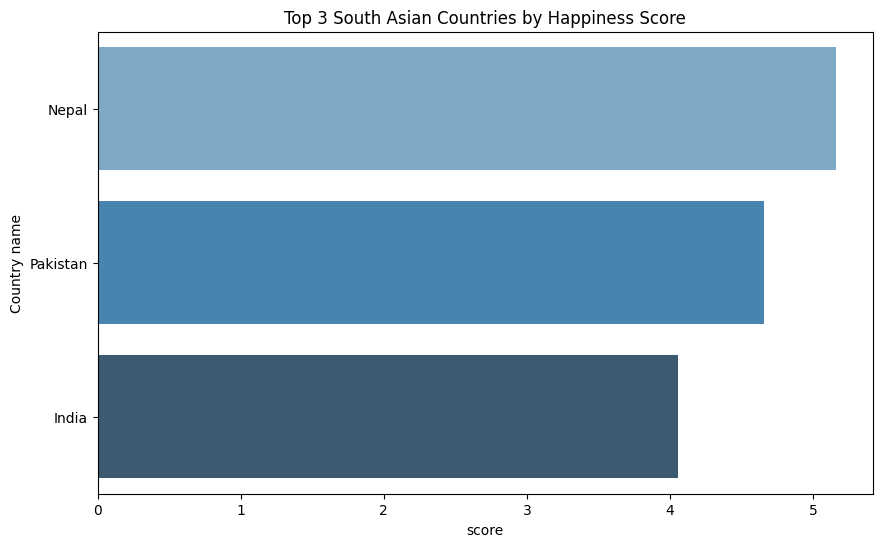

<ipython-input-37-463c802a7d8d>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='score', y='Country name', data=middle_east_df.nlargest(3, 'score'), palette='Oranges_d', color='blue')


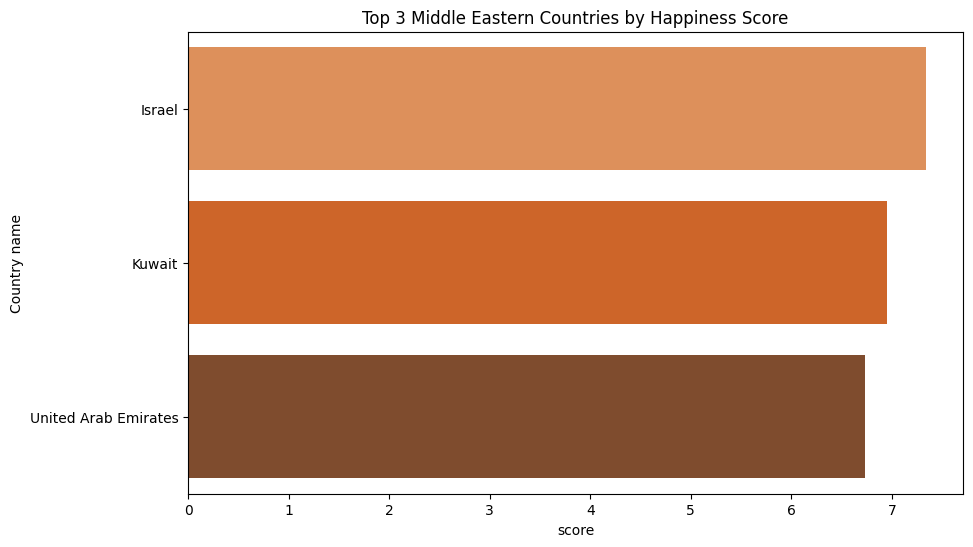

In [37]:
# Plot bar charts for top and bottom performers
plt.figure(figsize=(10, 6))
sns.barplot(x='score', y='Country name', data=south_asia_df.nlargest(3, 'score'), palette='Blues_d', color='blue')
plt.title('Top 3 South Asian Countries by Happiness Score')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x='score', y='Country name', data=middle_east_df.nlargest(3, 'score'), palette='Oranges_d', color='blue')
plt.title('Top 3 Middle Eastern Countries by Happiness Score')
plt.show()

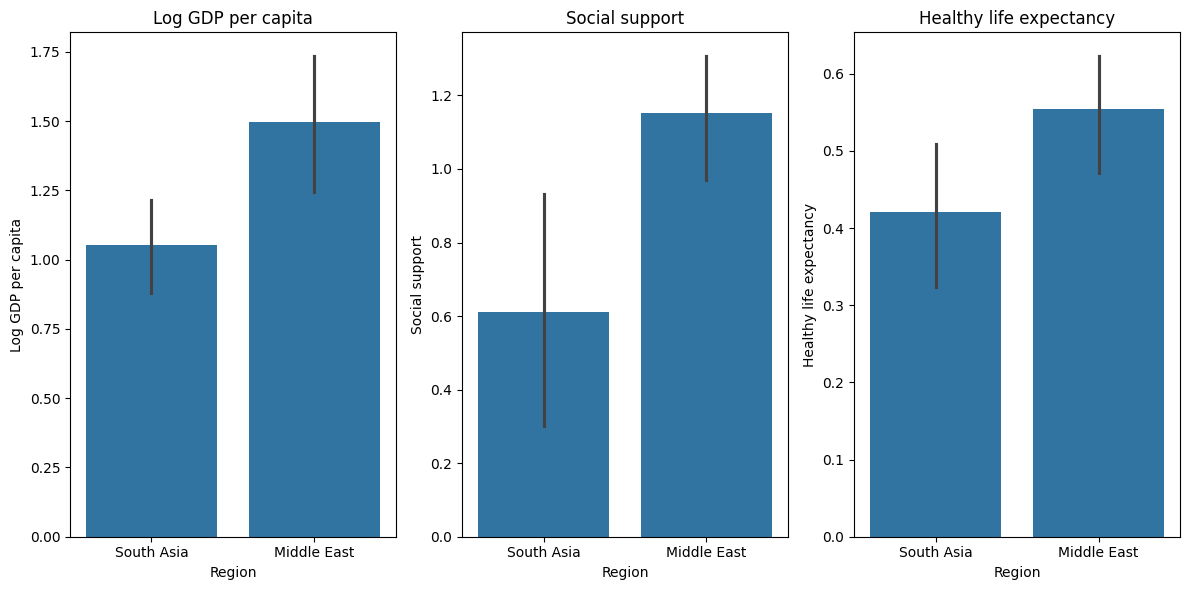

In [38]:
# 3. metric comparisons:
# Compare gdp per capita, social support, and healthy life expectancy
metrics = ['Log GDP per capita', 'Social support', 'Healthy life expectancy']

plt.figure(figsize=(12, 6))
for i, metric in enumerate(metrics):
    plt.subplot(1, 3, i+1)
    sns.barplot(x='Region', y=metric, data=pd.concat([
        south_asia_df.assign(Region='South Asia'),
        middle_east_df.assign(Region='Middle East')
    ]))
    plt.title(metric)

plt.tight_layout()
plt.show()


In [39]:
# 4. happiness disparity:
# Compute range and coefficient of variation (cv) for score
def compute_stats(df, region_name):
    score_range = df['score'].max() - df['score'].min()
    score_cv = (df['score'].std() / df['score'].mean()) * 100
    print(f"\n{region_name} Happiness Score Range: {score_range:.2f}")
    print(f"{region_name} Happiness Score Coefficient of Variation: {score_cv:.2f}%")

compute_stats(south_asia_df, "South Asia")
compute_stats(middle_east_df, "Middle East")



South Asia Happiness Score Range: 3.44
South Asia Happiness Score Coefficient of Variation: 30.21%

Middle East Happiness Score Range: 4.63
Middle East Happiness Score Coefficient of Variation: 28.94%


In [40]:
# 5. correlation analysis:
# Correlation of score with freedom and generosity
metrics_to_correlate = ['Freedom to make life choices', 'Generosity']

print("\nCorrelation Analysis:")
for metric in metrics_to_correlate:
    south_corr = south_asia_df['score'].corr(south_asia_df[metric])
    middle_corr = middle_east_df['score'].corr(middle_east_df[metric])
    print(f"Correlation of Score with {metric} in South Asia: {south_corr:.2f}")
    print(f"Correlation of Score with {metric} in Middle East: {middle_corr:.2f}")



Correlation Analysis:
Correlation of Score with Freedom to make life choices in South Asia: 0.80
Correlation of Score with Freedom to make life choices in Middle East: 0.86
Correlation of Score with Generosity in South Asia: 0.87
Correlation of Score with Generosity in Middle East: 0.63


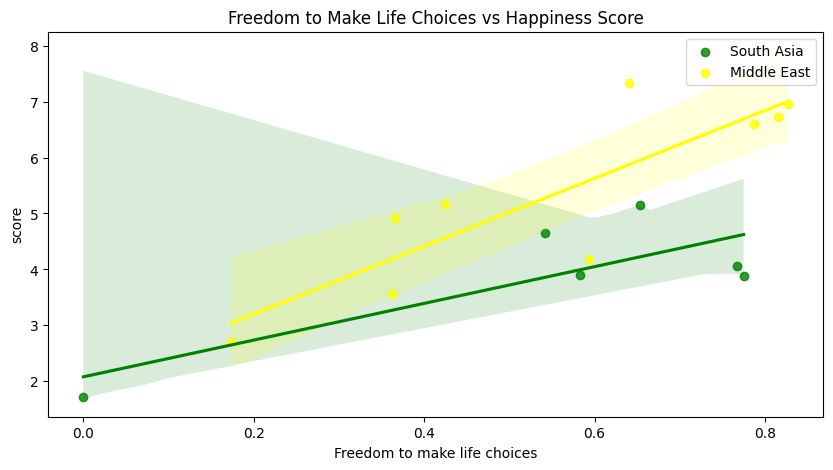

In [41]:
# Scatter visualize for correlation visualization
plt.figure(figsize=(10, 5))
sns.regplot(x='Freedom to make life choices', y='score', data=south_asia_df, label='South Asia', color='green')
sns.regplot(x='Freedom to make life choices', y='score', data=middle_east_df, label='Middle East', color= 'yellow')
plt.title("Freedom to Make Life Choices vs Happiness Score")
plt.legend()
plt.show()

In [42]:
# 6. outlier detection:
# Detect outliers in score and gdp per capita using iqr
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[column] < Q1 - 1.5 * IQR) | (df[column] > Q3 + 1.5 * IQR)]
    return outliers

outliers_south = detect_outliers(south_asia_df, 'score')
outliers_middle = detect_outliers(middle_east_df, 'score')

print("\nOutliers in South Asia based on Score:")
print(outliers_south[['Country name', 'score']])

print("\nOutliers in Middle East based on Score:")
print(outliers_middle[['Country name', 'score']])



Outliers in South Asia based on Score:
    Country name  score
142  Afghanistan  1.721

Outliers in Middle East based on Score:
Empty DataFrame
Columns: [Country name, score]
Index: []


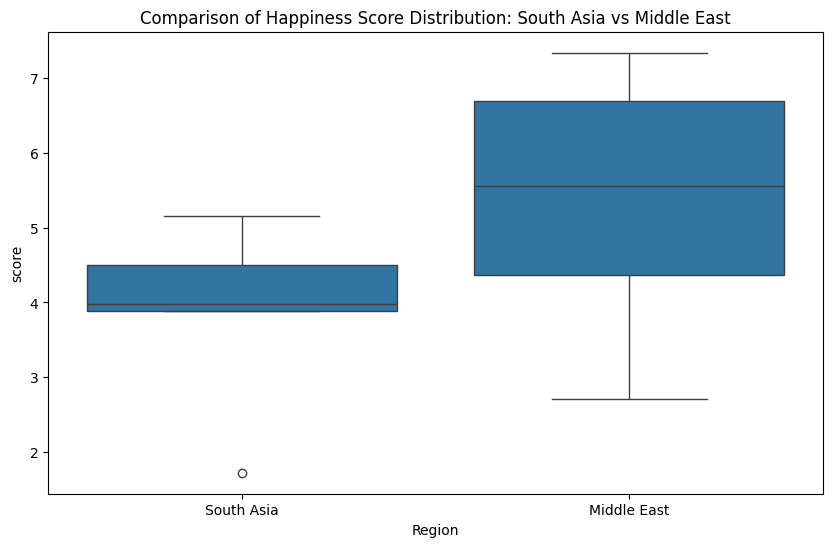

In [43]:
# 7. visualization: boxvisualizes
plt.figure(figsize=(10, 6))
sns.boxplot(x='Region', y='score', data=pd.concat([
    south_asia_df.assign(Region='South Asia'),
    middle_east_df.assign(Region='Middle East')
]))
plt.title("Comparison of Happiness Score Distribution: South Asia vs Middle East")
plt.show()